In [4]:
import sys, time

In [5]:
sys.path.append('..')

In [6]:
from pathlib import Path
from collections import namedtuple

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(rc={'figure.figsize':(9,6)})
import torch

import numpy as np
import pandas as pd
import pickle as pkl

import gym

import autotrain
import autotrain.gym_env 
import autotrain.agent.replay_memory as replay_memory

# if gpu is to be used
DEVICE = torch.device("cuda:3")

In [16]:
RESULTS_ROOT = Path('./results')
PROTO_PATH = RESULTS_ROOT / 'full_min_proto_1_cifar_clone'

In [17]:
def pkl_load(path):
    with open(path, 'rb') as fp:
        return pkl.load(fp)
    

In [18]:
list((PROTO_PATH / '1_episode').iterdir())

[PosixPath('results/full_min_proto_1_cifar_clone/1_episode/policy_net.ckpt'),
 PosixPath('results/full_min_proto_1_cifar_clone/1_episode/env_params.pkl'),
 PosixPath('results/full_min_proto_1_cifar_clone/1_episode/replay_buffer.pkl'),
 PosixPath('results/full_min_proto_1_cifar_clone/1_episode/env_loss.pkl'),
 PosixPath('results/full_min_proto_1_cifar_clone/1_episode/target_net.ckpt'),
 PosixPath('results/full_min_proto_1_cifar_clone/1_episode/env_mdp_log.csv')]

In [19]:
class ExpEval:
    def __init__(self, exp: Path):
        self.exp = exp
        self.parse = lambda s: int(s.name.split('_')[0])
        self.episodes = sorted(self.parse(p) for p in list(self.exp.iterdir()))
        
        self.Episode = namedtuple('Episode', ['policy_net', 'target_net', 'env_params', 'replay_buffer', 'env_loss', 'mdplog'])
        
    
    def inspect_episode(self, episode: int):
        pass
    
    def __getitem__(self, idx):
        return pd.read_csv(self.exp / f'{idx}_episode' / 'env_mdp_log.csv')
                
    def plot_exp(self, var='reward'):
        """ plots one variable from mdp across an experiment """
        
        l = []
        
        for episode in self.exp.iterdir():
            mdplog = pd.read_csv(episode / 'env_mdp_log.csv')
            l.append(mdplog.iloc[-1][var])
        
        ax = sns.lineplot(y=l , x=range(len(l)))
        ax.set_title(f'{self.exp.name} Exp.: {var} vs Time')
        ax.set_xlabel('Num. Episodes')
        ax.set_ylabel(var)
    
    def plot_episodes(self, var, interval):
        """ plots one variable from many experiments against time """
        
        logs = []
        
        for e in self.episodes[interval]:
            mdplog = self[e]
            mdplog['ep_id'] = e
            logs.append(mdplog)
        
        result = pd.merge(logs) # this kinda thing
        sns.lineplot(data=result, y=var, x='t', hue='ep_id')
        
    def plot_avg_reward(self):
        pass
    
    

In [20]:
protoeval = ExpEval(PROTO_PATH)

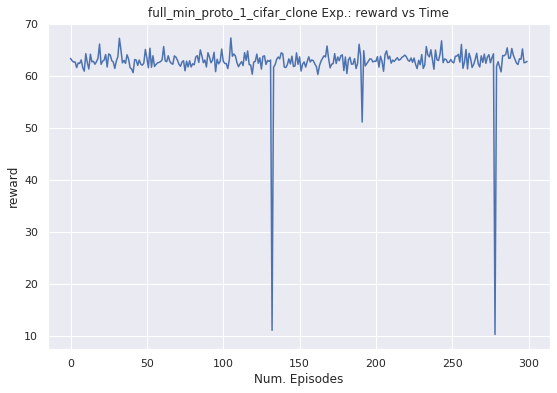

In [21]:
protoeval.plot_exp('reward')

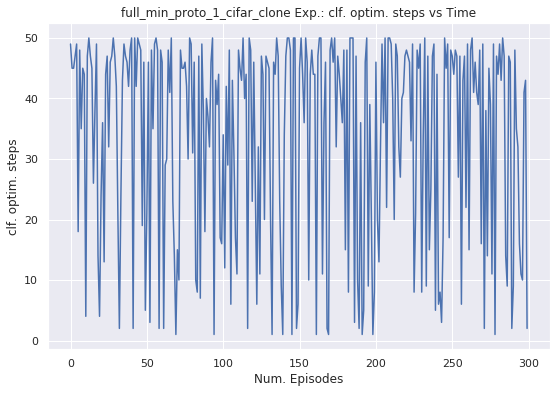

In [22]:
protoeval.plot_exp('clf. optim. steps')

In [23]:
protoeval = ExpEval(RESULTS_ROOT / 'full_min_proto_1_phi_changes')

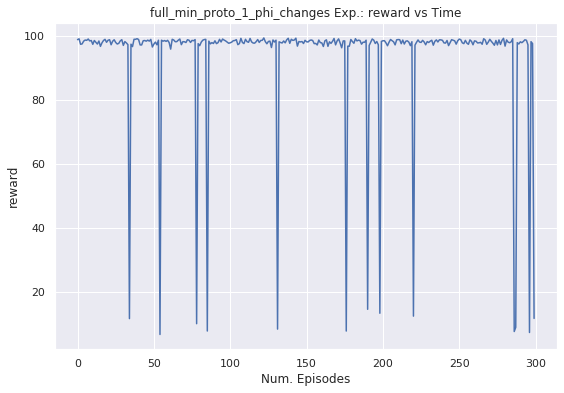

In [24]:
protoeval.plot_exp('reward')

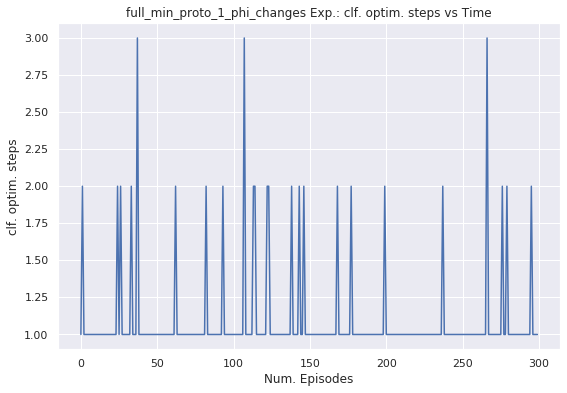

In [25]:
protoeval.plot_exp('clf. optim. steps')

In [26]:
protoeval = ExpEval(RESULTS_ROOT / 'full_min_proto_1_sgd_cifar_clone')

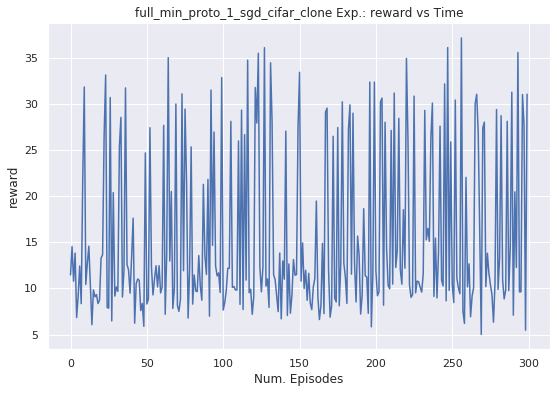

In [27]:
protoeval.plot_exp('reward')

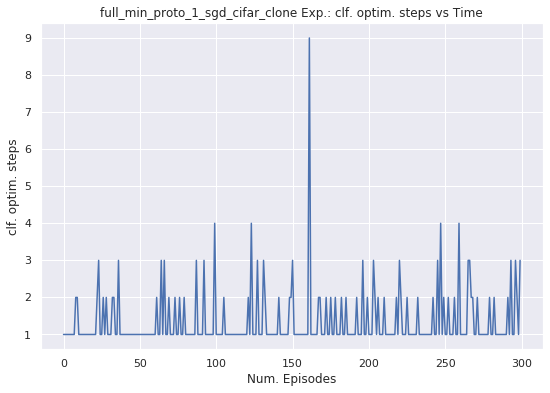

In [29]:
protoeval.plot_exp('clf. optim. steps')

In [31]:
protoeval = ExpEval(RESULTS_ROOT / 'SGD_RISA_proto_1_cifar_clone')

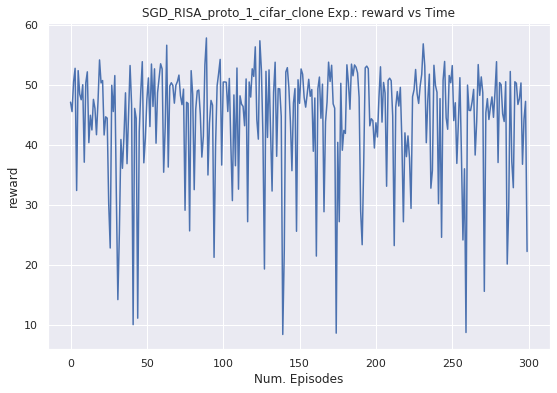

In [32]:
protoeval.plot_exp('reward')

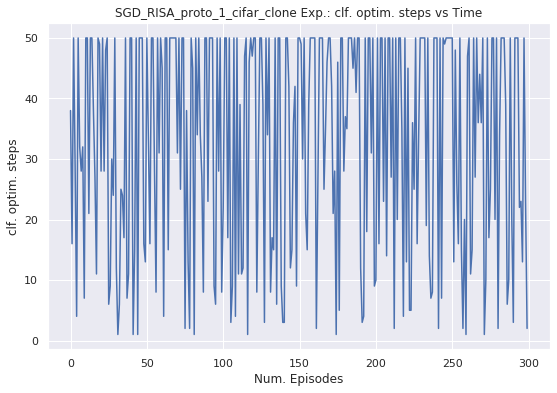

In [33]:
protoeval.plot_exp('clf. optim. steps')